# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, This are the test functions.<br><br>Every Grader function has to return True.**


1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'> 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_j^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

$ \ $

1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   We can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Ref : we can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.

3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>

$ \hat {y}_{ij} = \mu + b_i + c_j + \text {dot product}(u_i , v_j) $

9. Choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition we can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

 # <font color='red'> 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can we predict this signal given the features U?


> __Note 1__ : There is no train test split in the data, let see how to do matrix factorization with the help of SGD and application of truncated SVD. <br><br>
> __Note 2__ : Let's check if scaling of $U$, $V$ matrices improve the metric 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from scipy.sparse import csr_matrix
from scipy.linalg import svd
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD

<font color='red'> Reading the csv file </font>

In [2]:
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [3]:
data.shape

(89992, 3)

<font color='red'>Create Adjacency Matrix </font>

In [4]:
def get_adjacency_matrix(data):
    row = np.array(data['user_id'])
    col = np.array(data['item_id'])
    data_ = np.array(data['rating'])
    return csr_matrix((data_, (row, col))).toarray()

In [5]:
adjacency_matrix = get_adjacency_matrix(data)

In [6]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [7]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [8]:
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5, n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>SVD decompostion</font>

In [9]:
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=10, n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 10)
(10,)
(1681, 10)


<font color='red'>Compute mean of ratings</font>

In [10]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    
    return ratings.mean()

In [11]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [12]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Note: Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [13]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    
    return np.zeros(dim) 

In [14]:
dim= adjacency_matrix.shape[0] # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [15]:
dim= adjacency_matrix.shape[1] # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [16]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [21]:
def derivative_db(user_id,item_id,rating,U1,V1,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    db = (2 * alpha * b_i[user_id]) - ( 2 * (rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id], VT.T[item_id])))
    #print((alpha * b_i[user_id]))
    #print(((rating - mu - b_i[user_id]-c_j[item_id] - np.dot(U[user_id], VT.T[item_id]))))
    #print(db)
    return db

<font color='cyan'>Grader function -4 </font>

In [22]:
def grader_db(value):
    assert(np.round(value,3)==-0.913)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2, n_iter=5, random_state=24)
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [23]:
def derivative_dc(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/dc_j'''
    
    dc = (2*alpha*c_j[item_id])-(2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id])))
    #print(dc)
    return dc

<font color='cyan'>Grader function - 5 </font>

In [24]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_dc(58,504,5,U1,V1,mu, alpha)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dotproduct}(u_i , v_j) $

In [25]:
def train_sgd(epoch, eta0, alpha, user_data, item_data, ratings):
    rmse = []
    for _ in epoch: 
        pred = []
        for i,j,rating in zip(user_data, item_data, ratings):
            #print(user_data[x], item_data[x], ratings[x])
            diff_b = derivative_db(i, j, rating, U, VT, mu, alpha)
            diff_c = derivative_dc(i, j, rating, U, VT, mu, alpha)
            #print(b_i[i], c_j[j], eta0, diff_b, diff_c)
            b_i[i] = b_i[i] - (eta0*diff_b) 
            c_j[j] = c_j[j] - (eta0*diff_c)
            
            pred_ = mu + b_i[i] + c_j[j] + np.dot(U[i],VT.T[j])
            pred.append(pred_)
        
        rmse.append(np.sqrt(np.mean((pred - ratings)**2)))
        
    return rmse

In [26]:
epoch = list(range(50))
eta0 = 0.001
alpha = 0.001

rmse = train_sgd(epoch, eta0, alpha, data.user_id, data.item_id, data.rating)

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

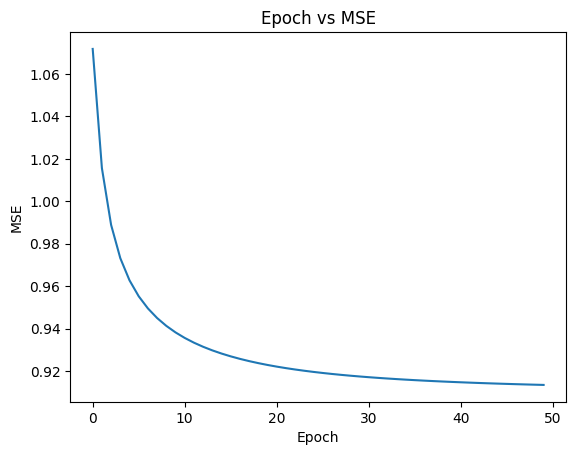

In [27]:
plt.plot(epoch, rmse)
plt.xlabel('Epoch') 
plt.ylabel('MSE') 
  
plt.title('Epoch vs MSE') 
   
plt.show() 

### Learn the vectors  ui ,  vj  with the help of SGD algo

In [56]:
epoch = list(range(10))
eta0 = 0.001
alpha = 0.001

# Initializing vectors
n_factors = 10 # number of features
n_users = adjacency_matrix.shape[0]
n_items = adjacency_matrix.shape[1]

user_vecs = np.random.normal(loc=0, scale=0.1, size=(n_users, n_factors)) 
item_vecs = np.random.normal(loc=0, scale=0.1, size=(n_items, n_factors)) 

In [57]:
def train_sgd_u_i(epoch, eta0, alpha, mu, user_data, item_data, ratings):
    rmse = []
    for c in epoch: 
        pred = []
        for i,j,rating in zip(user_data, item_data, ratings):
            diff_u = (alpha * np.linalg.norm(user_vecs[i])) - (2*(rating - mu - b_i[i] - c_j[j] - np.dot(user_vecs[i].T, item_vecs[j])))
            diff_i = (alpha * np.linalg.norm(item_vecs[j])) - (2*(rating - mu - b_i[i] - c_j[j] - np.dot(user_vecs[i].T, item_vecs[j])))

            user_vecs[i] = user_vecs[i] - (eta0*diff_u)
            item_vecs[j] = item_vecs[j] - (eta0*diff_i)

            pred_ = mu + b_i[i] + c_j[j] + np.dot(user_vecs[i],item_vecs[j].T)
            pred.append(pred_)
            
        #print(np.sqrt(np.mean((ratings-pred)**2)))
        rmse.append(np.sqrt(np.mean((ratings-pred)**2)))
        
    return rmse

In [58]:
rmse = train_sgd_u_i(epoch, eta0, alpha, mu, data.user_id, data.item_id, data.rating)

#### Plotting loss

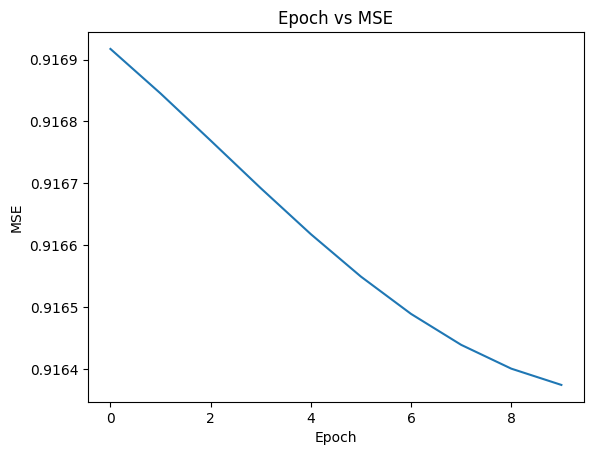

In [59]:
plt.plot(epoch, rmse)
plt.xlabel('Epoch') 
plt.ylabel('MSE') 
  
plt.title('Epoch vs MSE') 
   
plt.show() 

## 2

In [28]:
U

array([[ 0.0662257 ,  0.00788876, -0.01253031, ..., -0.02704498,
         0.07086212, -0.02758145],
       [ 0.01364432, -0.04889477,  0.05655475, ..., -0.01019208,
         0.03082807,  0.00574532],
       [ 0.00543826, -0.02512786,  0.02002747, ..., -0.00095906,
        -0.02177125,  0.00470304],
       ...,
       [ 0.00738924, -0.02597387,  0.00634282, ...,  0.01522106,
        -0.0006177 ,  0.00527598],
       [ 0.02499924,  0.00447793,  0.02605647, ..., -0.01629778,
        -0.01011073,  0.03065882],
       [ 0.04337341, -0.0028149 , -0.06077792, ..., -0.06915394,
         0.00552687,  0.04559998]])

In [36]:
data1=pd.read_csv('user_info.csv')
data1.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

X = U
y = data1['is_male'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((707, 10), (707,), (236, 10), (236,))

In [45]:
clf = SGDClassifier(loss='log_loss', random_state=15)
clf

SGDClassifier(loss='log_loss', random_state=15)

In [46]:
clf.fit(X=X_train, y=y_train)

SGDClassifier(loss='log_loss', random_state=15)

In [47]:
clf.score(X_test, y_test)

0.614406779661017

#### Model with Scaled data 

In [49]:
# Ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss'))
clf.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log_loss'))])

In [50]:
clf.score(X_test, y_test)

0.690677966101695

As we can see scaling learned matrix of user U increase accuracy from 61% to 69%.